<a href="https://colab.research.google.com/github/sammyGuru/Marvel-Level-1/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal#to generate samples from a multivariate normal distribution
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


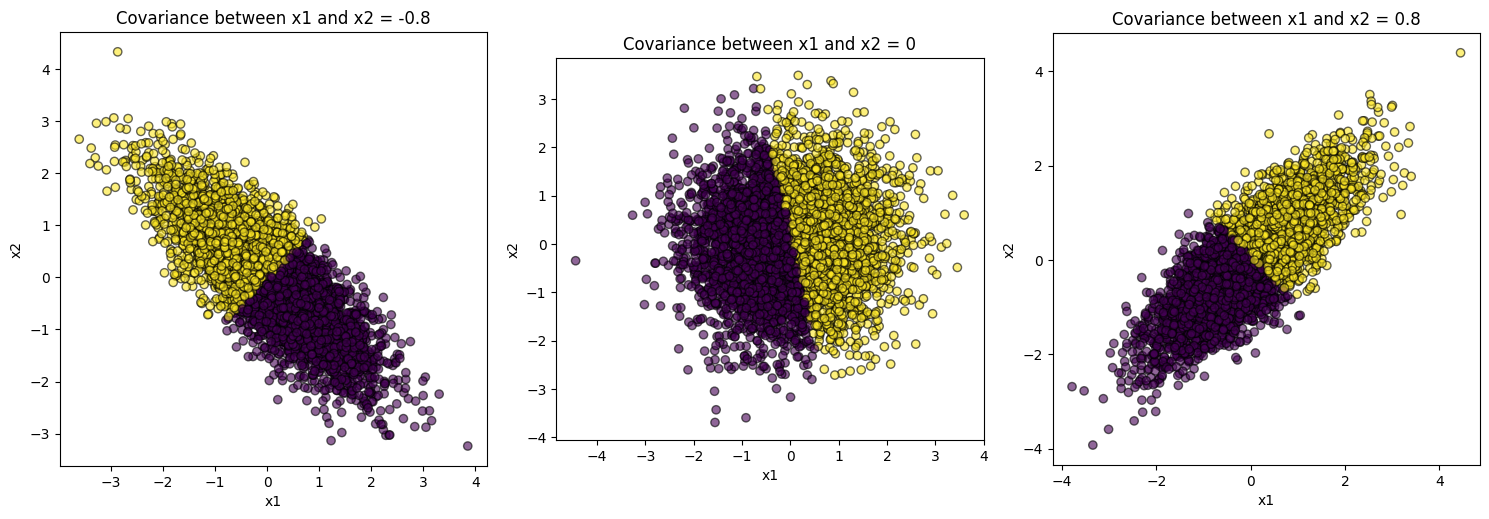

In [13]:
#settting an initial value for random number generator
np.random.seed(0)

mean = [0, 0] #mean values for each dimension.

# List of covariance values to iterate over
cov_values = [-0.8, 0, 0.8]#covariance: measure of extent to which the random variables change: if positive, one changes then other also changes

# Number of samples to generate
num_samples = 5000

# Create a figure and subplots
fig, axes = plt.subplots(1, len(cov_values), figsize=(15, 5))

# Generate samples for each covariance value
for i, cov_val in enumerate(cov_values):#returns both the index i and the value cov_val
    # Define covariance matrix
    cov_matrix = [[1, cov_val], [cov_val, 1]]#2x2 matrix(for 2 random variables), where the diagonal elements are the variances which are set to 1 and off-diagonal are set to co-var

    # Create multivariate normal distribution
    mv_normal = multivariate_normal(mean=mean, cov=cov_matrix)
    #In a multivariate normal distribution, each random variable can have a different mean and variance,
    #and there can be correlations between different pairs of variables.
    # Generate random samples from the multivariate normal distribution, consists of rows with samples and columns of different variables: here,2
    samples = mv_normal.rvs(size=num_samples)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=0)#to sample the cluster into 2 clusters
    labels = kmeans.fit_predict(samples)#fir K-means model to the data and predict cluster labels for each sample

    # Plot samples with cluster colors
    axes[i].scatter(samples[:, 0], samples[:, 1], c=labels, cmap='viridis', edgecolors='black', alpha=0.6) #samples is a 2d array with one row and two columns. x-axis takes all rows and 1st column, y axis: all wors and 2nd column
    axes[i].set_title(f'Covariance between x1 and x2 = {cov_val}')
    axes[i].set_xlabel('x1')
    axes[i].set_ylabel('x2')
    axes[i].set_aspect('equal')

plt.tight_layout()
plt.show()
#2 COLOURS SINCE K MEANS SPLITS IT INTO 2 CLUSTERS. SAMPLES ARE ASSIGNED TO ONE OF THE 2 CLUSTERS BASED ON THEIR CLOSENESS TO THE CLUSTER CENTROID.
#k-means reduces variance within cluster and increases variance between 2 clusters